# Test over Synthetic Data

We will generate 1000 data points. Each data point will contain 150 predictors ($X_i = x_{i1}, x_{i2}, \dots, x_{i150}$) and the response of the system ($y_i$). To generate the random data points $X=<X_1, X_2, \dots, X_{1000}>$, we sample a thousand times from the binomial distribution with $n=150$ and $p=0.5$.

Let's first import the necessary modules.

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import main

To generate $X$, we will use a simply `numpy` trick.

In [2]:
X = np.random.rand(1000, 70)
X = np.round(X)
X

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

Now that we have $X$, it's time to generate our synthetic system's response $Y$. To do that, first we'll need to identify the noisy function of actual predictors according to which response is made. Since our statistical method works for sparse models, we say that this underlying function depends only on the following 4 predictors out of 70 predictors:
                $$<x_{13}, x_{31}, x_{38}, x_{55}>$$

We'll represent this function by $F: \{0,1\}^7 \rightarrow \mathbb{Z}_{3} $, where $\mathbb{Z}_{3} = \{0, 1, 2\}$.

We have a generated boolean function stored as a csv. Lets load it.

In [3]:
df = pd.read_csv("data/bool_func.csv", index_col=0)
df

,x55,x38,x31,x13,y0,y1,y2
0,0.0,0.0,0.0,0.0,7.715613e-01,4.817829e-10,2.284387e-01
1,0.0,0.0,0.0,1.0,2.581223e-04,9.997419e-01,1.238610e-21
2,0.0,0.0,1.0,0.0,9.999999e-01,7.076523e-08,2.697647e-08
3,0.0,0.0,1.0,1.0,9.032021e-01,1.337596e-14,9.679786e-02
4,0.0,1.0,0.0,0.0,9.925948e-01,4.670690e-03,2.734479e-03
5,0.0,1.0,0.0,1.0,8.782210e-01,6.807604e-42,1.217790e-01
6,0.0,1.0,1.0,0.0,1.298939e-11,1.000000e+00,7.649856e-39
7,0.0,1.0,1.0,1.0,9.986412e-01,5.024311e-07,1.358252e-03
8,1.0,0.0,0.0,0.0,3.150446e-04,9.996850e-01,1.792178e-25
9,1.0,0.0,0.0,1.0,2.755406e-26,1.000000e+00,1.799499e-17


In [4]:
def bool_func(xi):
    """Takes an index/row of truth table and returns the response 
    according to the boolean function"""
    if isinstance(xi, int):
        weight_arr = df.iloc[xi, 4:].values
    else:
        bool_arr = np.all(df.iloc[:, :4].values == xi, axis=1)
        weight_arr = df.iloc[bool_arr, 4:].iloc[0].values
    return np.random.choice(3, p=weight_arr)

With `bool_func` we can start generating responses of our synthetic system. The response depends only on actual predictors of the system.

In [5]:
X_actual = X[:, [55, 38, 31, 13]]
X_actual.shape

(1000, 4)

In [6]:
Y = np.apply_along_axis(bool_func, axis=1, arr=X_actual)
Y.shape

(1000,)

Now we have all we need. Let's see if our statistical method could predict which predictors does the response depends upon.

In [7]:
x = main.metropolis(X, Y, X.shape[1], 3, it=8000)

0 took 3.0994415283203125e-06 seconds
500 took 41.895726919174194 seconds
1000 took 17.659021139144897 seconds
1500 took 14.095874786376953 seconds
2000 took 15.125675201416016 seconds
2500 took 14.356765985488892 seconds
3000 took 15.184992551803589 seconds
3500 took 20.353261470794678 seconds
4000 took 16.897313594818115 seconds
4500 took 18.548704862594604 seconds
5000 took 14.620729923248291 seconds
5500 took 15.080518007278442 seconds
6000 took 15.710086584091187 seconds
6500 took 18.35033631324768 seconds
7000 took 15.285919427871704 seconds
7500 took 15.435374736785889 seconds
********** loop took 285.5228273868561 seconds **********


In [8]:
pd.DataFrame(x).to_csv("data/mcmc-1.csv")
pd.DataFrame(x).to_excel("data/mcmc-1.xlsx")

In [9]:
plt.ioff() # turn off interactive mode

In [10]:
data = np.array(x)
data.shape

(8001, 70)

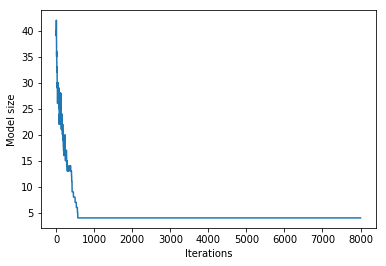

In [16]:
plt.plot(np.arange(data.shape[0]), np.count_nonzero(data, axis=1))
plt.xlabel("Iterations")
plt.ylabel("Model size")
plt.show()

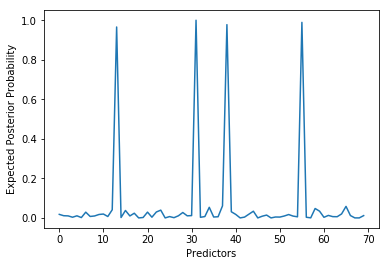

In [12]:
plt.plot(np.arange(data.shape[1]), data.mean(axis=0))
plt.xlabel("Predictors")
plt.ylabel("Expected Posterior Probability")
plt.show()

In [13]:
pd.DataFrame(data).assign(count=-1).groupby(list(range(70))).count()

count
0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31   32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69          
False False False False False False False False False False False False False False False True  False False False False True  False True  True  False False False True  True  False False True False False True  False False True  False True  False False False False True  False False False False False False False False True  False False False False True  True  False False False False False True  False False False True       1
                                                                                                                                                                              True  False True False False True  False False True  False True  False False False False True  False False False False False False False False True  False False False False True  True  False False False False False True  False False False False      3
                                                                                                                                                                                                                                                                                                                                                                                                                             True      15
                                                                                                                                                                                                                                                           True  False True  False False False False False False False False True  False False False False True  True  False False False False False True  False False False True       2
                                                                                                                                                                                                                                                                                                                 True  False True  False False False False True  True  False False False False False True  False False False False      2
                                                                                                                                                                                                                                                                                                                                                                                                                             True       1
                                                                              True  False False False False False False False False False False False False False False False False False True False False False False False False True  False False False False False False False False False False False False False False False False True  False False False False False False False False False False False False False False   7434
                                                                                                                                                                                                           True  False False False True  False False False False False False False False False False False False False False False False True  False False False False False False False False False False False False False False      9
                                                                                                                                                                

In [14]:
predicted_model = data.mean(axis=0) > 0.7
predicted_model.nonzero()

(array([13, 31, 38, 55]),)